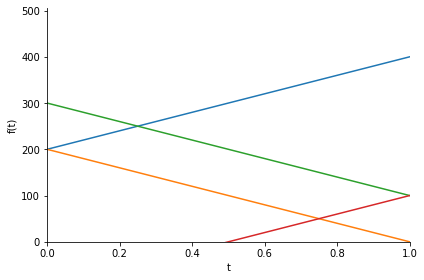

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
from sympy import * 
from sympy.plotting import plot


x, t,  a, v, v_0, v_c, v_1, t_a, t_d, t_f, v_max= symbols('x t a_max v v_0 v_c v_1 t_a t_d t_f v_max', real=True)


v0u = plot((a*t+v_0).subs(v_0,200).subs(a,200), show=False,xlim=(0,1), ylim=(0,505))
v0d = plot((-a*t+v_0).subs(v_0,200).subs(a,200), show=False,xlim=(0,1), ylim=(0,505))

v1u = plot((-a*(t-t_f)+v_1).subs(v_1,100).subs(a,200).subs(t_f,1), show=False, xlim=(0,1), ylim=(0,505))
v1d = plot((a*(t-t_f)+v_1).subs(v_1,100).subs(a,200).subs(t_f,1), show=False, xlim=(0,1), ylim=(0,505))

v0u.append(v0d[0])
v0u.append(v1u[0])
v0u.append(v1d[0])

v0u.show()

In [3]:
# Solve the triangle using line equations 
# Given x, v0, v1. Accelerate to v_c, then back down
%reset -f 
from sympy import * 
import math 

x, t,  a, v, v_0, v_c, v_1, t_a, t_d, t_f, v_max= symbols('x t a_max v v_0 v_c v_1 t_a t_d t_f v_max', real=True)

# Hexagon calculations

t_a = (v_c - v_0) / a
t_d = (v_1 - v_c) / -a

x_a = ((v_0 + v_c) / 2) * t_a
x_d = ((v_c + v_1) / 2) * t_d

x_a_ = a*t_a**2/2 + v_0
x_d_ = a*t_d**2/2 + v_1

t_c = t - (t_a + t_d)
x_c = t_c/v_c

x_hex = simplify(x_a+x_c+x_d)


#==================

# Linear equations

v0_u  =  a*t+v_0
v0_d  =  -a*t+v_0

v1_u  = -a*(t-t_f)+v_1
v1_d  = a*(t-t_f)+v_1

e_v0 = Eq(v,v0_u)
e_v1 = Eq(v,v1_u)

# =================

e_x =   Eq(x,   (v_0 + v_1)/2 * t)  # No a
e_t =   Eq(x,   (a*t**2)/2)         # No v
e_v_1 = Eq(v_1, (v_0 - a*t))        # No x

# Solve for V_C for an accel profile -- no decel phase
solve(Eq(x,x_a+ (v_c * (t-t_a))), v_c)

# Lower Intersection
t_i = solve(Eq(v0_d , v1_d), t)[0]

# Upper Intersection
t_u =solve(Eq(v0_u , v1_u), t)[0]

x_a.subs(v_c, 0)

-v_0**2/(2*a_max)

In [6]:
# Ramp profiles
# Triangular profiles

%reset -f 
from sympy import * 
from IPython.display import display, HTML, Markdown
x, t,  a, v, v_0, v_c, v_1, t_a, t_d, t_f, v_max= symbols('x t a_max v v_0 v_c v_1 t_a t_d t_f v_max', real=True)

t_a = ((v_c - v_0) / a)
x_a = v_c/ 2 * t_a

t_c = t - t_a
x_c = v_c*t_c


display(Markdown('## Solve for v_c'))
display((solve(Eq(x, (x_a+x_c)), v_c)[0]))
display(str((solve(simplify(Eq(x, x_a+x_c)), v_c)[0])))

display(Markdown('## Area'))

display(x_a+x_c)
display(Markdown('### Differentiated'))

display(diff(Eq(x, (x_a+x_c)), v_c))

Eq(v_c, solve(Eq(x,(x_a+x_c)), v_c)[1])


## Solve for v_c

a_max*t + v_0/2 - sqrt(4*a_max**2*t**2 + 4*a_max*t*v_0 - 8*a_max*x + v_0**2)/2

'a_max*t + v_0/2 - sqrt(4*a_max**2*t**2 + 4*a_max*t*v_0 - 8*a_max*x + v_0**2)/2'

## Area

v_c*(t - (-v_0 + v_c)/a_max) + v_c*(-v_0 + v_c)/(2*a_max)

### Differentiated

Derivative(Eq(x, v_c*(t - (-v_0 + v_c)/a_max) + v_c*(-v_0 + v_c)/(2*a_max)), v_c)

Eq(v_c, a_max*t + v_0/2 + sqrt(4*a_max**2*t**2 + 4*a_max*t*v_0 - 8*a_max*x + v_0**2)/2)

In [18]:
t_a = ((v_c - v_0) / a)
x_a = v_c/ 2 * t_a
x_a.subs(t, t_a)
solve(Eq(x, x_a.subs(t, t_a)), v_c)[1]

v_0/2 + sqrt(8*a_max*x + v_0**2)/2

[v_0/2 - sqrt(8*a_max*x + v_0**2)/2, v_0/2 + sqrt(8*a_max*x + v_0**2)/2]

In [14]:
solve(Eq(x, (v_0+v_1)/2*t), t)

[2*x/(v_0 + v_1)]

In [ ]:
# Basic Trapezoid
%reset -f 
from sympy import * 
from IPython.display import display, HTML, Markdown
x, t,  a, v, v_0, v_c, v_1, t_a, t_d, dv, v_max= symbols('x t a_max v v_0 v_c v_1 t_a t_d dv v_max', real=True)

display(Markdown('## Basic Trapezoid'))

e1 = Eq(x,(v_0+v_1)/2*t)
e2 = Eq(v_1,-v_0+a*t)

e4 = Eq(v_0, solve(e1.subs(t, solve(e2, t)[0]), v_1)[1])
display(e4)
print(e4)



In [ ]:
%reset -f 
from sympy import * 
from IPython.display import display, HTML, Markdown
x, t,  a, v, v_0, v_c, v_1, t_a, t_d, t_f, v_max= symbols('x t a_max v v_0 v_c v_1 t_a t_d t_f v_max', real=True)

t_a = ((v_c - v_0) / a)
x_a = a*t_a**2/2 + v_0*t_a

t_c = t - t_a
x_c = v_c*t_c

str(solve(Eq(x, (x_a+x_c)), v_c)[0])

In [ ]:
# Triangular profiles
%reset -f 
from sympy import * 
x, t,  a, v, v_0, v_c, v_1, t_a, t_d, t_f, v_max= symbols('x t a_max v v_0 v_c v_1 t_a t_d t_f v_max', real=True)

t_a = ((v_c - v_0) / a)
t_d = ((v_1 - v_c) / a)
x_a_ = a*t_a**2/2 + v_0
x_d_ = a*t_d**2/2 + v_1

t_c = t - t_a
x_c = x - x_a




In [ ]:
%reset -f 
from sympy import * 
from IPython.display import HTML
x, t,  a, v, v_0, v_c, v_1, t_a, t_d, t_f, v_max= symbols('x t a_max v v_0 v_c v_1 t_a t_d t_f v_max', real=True)

e1 = Eq(x, a*t**2/2)
display(e1)
e2 = Eq(v_1, v_c+a*t)
display(e2)
display(HTML('Distance traveled in acceleration'))
solve(Eq(solve(e2, t)[0], solve(e1, t)[0]),x)[0]

In [ ]:
x_a = (v_0-v_c)**2/(2*a)
x_d = (v_c-v_1)**2/(2*a)
solve(x_a+x_d, v_c)[0]

In [ ]:
simplify((x_a+x_d).subs(v_1,1000).subs(v_0,3000).subs(a,50_000))

In [ ]:
%reset -f 
from sympy import * 
from IPython.display import HTML
x, t,  a, v, v_0, v_c, v_1, t_a, t_d, t_f, v_max= symbols('x t a_max v v_0 v_c v_1 t_a t_d t_f v_max', real=True)

t_ad = (v_0-v_1)/a
x_ad = (v_0+v_1)/2*t_ad
str(simplify(x_ad))

In [ ]:

%reset -f 
from sympy import * 

x, t,  a, v, v_0, v_c, v_1, t_a, t_d, t_f, v_max= symbols('x t a_max v v_0 v_c v_1 t_a t_d t_f v_max', real=True)

# Trapezoid calculations

t_ad = v_c / a # acel and decel are symmetric
x_ad = a*t_ad**2/2 
x_c = x - 2*x_ad
t_c = t - 2*t_ad

solve(Eq(v_c, simplify(x_c/t_c)),v_c)

In [5]:
from sympy import * 
x, t,  a, v, v_0, v_c, v_1, t_a, t_d, t_f, v_max= symbols('x t a_max v v_0 v_c v_1 t_a t_d t_f v_max', real=True)

# Trapezoid calculations
e1 = Eq(x,(v_0+v_1)/2*t)
e2 = Eq(a, (v_1-v_0)/t)

e3 = simplify(e2.subs(t, solve(e1, t)[0]))

str(e3)

'Eq(a_max, (-v_0**2 + v_1**2)/(2*x))'

In [4]:
from sympy import * 
x, t,  a, v, v_0, v_c, v_1, t_a, t_d, t_f, v_max= symbols('x t a_max v v_0 v_c v_1 t_a t_d t_f v_max', real=True)

simplify(1/((-v_0**2 + v_1**2)/(2*x)*t+v_1))

-2*x/(t*(v_0**2 - v_1**2) - 2*v_1*x)